### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.shape

(12684, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
# Calculate the number of null values per column
null_counts = data.isnull().sum()

# Calculate the percentage of null values per column
null_percentages = (data.isnull().sum() / len(data)) * 100

# Create a DataFrame of null counts and percentages
null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

# Filter out columns with no null values
null_info = null_info[null_info['Null Count'] > 0].sort_values(by='Null Percentage', ascending=False)

print("\nColumns with Null Values, their Count, and Percentage:\n")
null_info


Columns with Null Values, their Count, and Percentage:



,Null Count,Null Percentage
car,12576,99.148534
CoffeeHouse,217,1.710817
Restaurant20To50,189,1.490066
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Bar,107,0.843582


In [9]:
print(null_info)

                      Null Count  Null Percentage
car                        12576        99.148534
CoffeeHouse                  217         1.710817
Restaurant20To50             189         1.490066
CarryAway                    151         1.190476
RestaurantLessThan20         130         1.024913
Bar                          107         0.843582


------------------------------------------------------------------------------------------------

Observations:

The 'car' column has a very high proportion of missing data, with 12,576 null entries, representing approximately 99.15% of its values. 
Fw other columns have a much lower percentage of missing data: 
    'CoffeeHouse' has 217 nulls (about 1.71%), 
    'Restaurant20To50' has 189 nulls (approximately 1.49%), 
    'CarryAway' has 151 nulls (around 1.19%), 
    'RestaurantLessThan20' has 130 nulls (about 1.02%), and 
    'Bar' has the fewest nulls among these, with 107 missing values (roughly 0.84%).
    
The rest of the columns do not have any null values.

------------------------------------------------------------------------------------------------

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
# Drop the 'car' column
data = data.drop(columns=['car'])
print(f" 'car' column dropped")


# Identify columns with null values
null_cols = [col for col in data.columns if data[col].isnull().any()]
for col in null_cols:
    mode_value = data[col].mode()[0] # .mode() can return multiple if tied, take the first
    data[col].fillna(mode_value, inplace=True)
    print(f"Filled nulls in '{col}' with mode: '{mode_value}'")

 'car' column dropped
Filled nulls in 'Bar' with mode: 'never'
Filled nulls in 'CoffeeHouse' with mode: 'less1'
Filled nulls in 'CarryAway' with mode: '1~3'
Filled nulls in 'RestaurantLessThan20' with mode: '1~3'
Filled nulls in 'Restaurant20To50' with mode: 'less1'


In [11]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

----------------------------------------------------------------------------------------

'car' column (99.15% null): Drop the column due to its overwhelming percentage of missing values, making it uninformative.

Other null columns (all under 2% null): We may either impute with the median for numeric, or mode for strings, or drop the rows if losing a small fraction of data is acceptable. In this case, I imputed with mode as these low percentages have minimal impact.

----------------------------------------------------------------------------------------

4. What proportion of the total observations chose to accept the coupon?



In [12]:
# Get the percentage of rows for each unique value directly
percent_of_rows = data['Y'].value_counts(normalize=True) * 100

print("Percentage of rows for each unique value in 'Y':\n")
print(percent_of_rows)

Percentage of rows for each unique value in 'Y':

1    56.843267
0    43.156733
Name: Y, dtype: float64


----------------------------------------------------------------------------------------

Observation: about 56.8 % chose to accept the coupon

----------------------------------------------------------------------------------------

<AxesSubplot:xlabel='Y', ylabel='Count'>

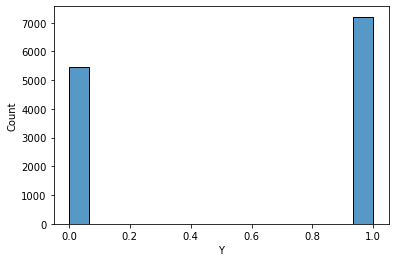

In [13]:
sns.histplot(data = data, x=data['Y'])

5. Use a bar plot to visualize the `coupon` column.

[Text(0, 0, 'Restaurant(<20)'),
 Text(1, 0, 'Coffee House'),
 Text(2, 0, 'Carry out & Take away'),
 Text(3, 0, 'Bar'),
 Text(4, 0, 'Restaurant(20-50)')]

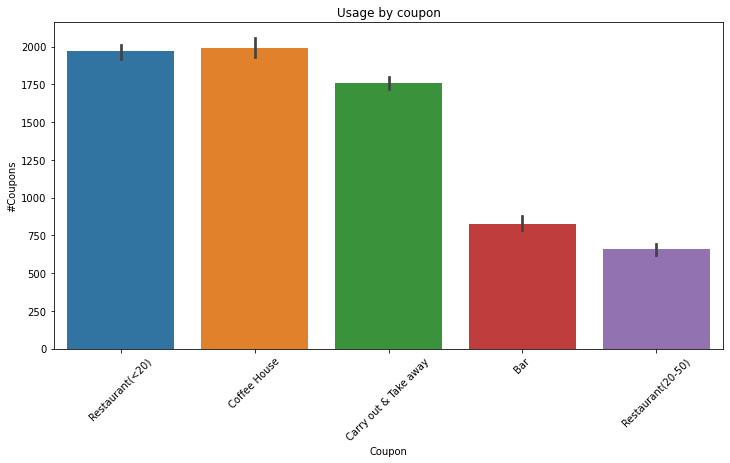

In [14]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='coupon', y='Y', data=data, estimator=np.sum, )
ax.set(xlabel='Coupon', ylabel='#Coupons', title='Usage by coupon')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

6. Use a histogram to visualize the temperature column.

In [15]:
data['temperature'].unique()

array([55, 80, 30], dtype=int64)

<AxesSubplot:xlabel='temperature', ylabel='Count'>

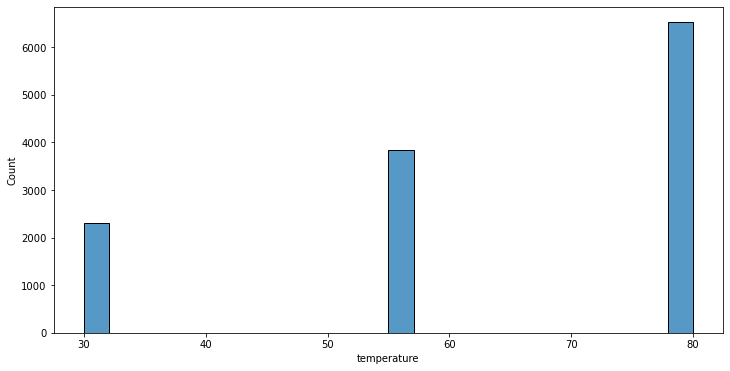

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data = data, x=data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [18]:
bar_coupons_df = data[data['coupon']=='Bar'].reset_index(drop=True)

bar_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
1,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
2,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
4,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2013,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2014,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2015,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [19]:
# Get the percentage of rows for each unique value 

percent_of_rows = bar_coupons_df['Y'].value_counts(normalize=True) * 100

print("Percentage of rows for each unique value in 'Y':\n")
print(percent_of_rows)

Percentage of rows for each unique value in 'Y':

0    58.998513
1    41.001487
Name: Y, dtype: float64


In [20]:
print(f"Proportion of bar coupons accepted : {percent_of_rows[1]:0.1f}%")

Proportion of bar coupons accepted : 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [21]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [22]:
# Define the categories for '3 or fewer times a month' and 'more'
bar_less_than_equal_3 = ['never', 'less1', '1~3']
bar_more_than_3 = ['4~8', 'gt8']

In [23]:
# Filter out rows where 'Bar' is NaN
data_filtered = data.dropna(subset=['Bar'])


# Create two DataFrames based on the 'Bar' frequency
data_bar_less_than_equal_3 = data_filtered[data_filtered['Bar'].isin(bar_less_than_equal_3)]
data_bar_more_than_3 = data_filtered[data_filtered['Bar'].isin(bar_more_than_3)]

In [24]:
# Calculate the acceptance rate (mean of 'Y') for each group
acceptance_rate_less_than_equal_3 = data_bar_less_than_equal_3['Y'].value_counts(normalize=True).loc[1] * 100
acceptance_rate_more_than_3 = data_bar_more_than_3['Y'].value_counts(normalize=True).loc[1] * 100

# Print the results
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_less_than_equal_3:.2f}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2f}%")

Acceptance rate for those who went to a bar 3 or fewer times a month: 56.16%
Acceptance rate for those who went to a bar more than 3 times a month: 62.25%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
# Get unique values in the 'age' column
print(data['age'].unique())

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [26]:
# Define categories for 'Bar' column: 'more than once a month'
# This includes '1~3', '4~8', and 'gt8'
bar_more_than_once_a_month = ['1~3', '4~8', 'gt8']

# Define categories for 'age' column: 'over the age of 25'
# This includes ages 26, 31, 36, 41, 46, and '50plus'
age_over_25 = ['26', '31', '36', '41', '46', '50plus']

In [27]:
# Group 1: Drivers who go to a bar more than once a month AND are over the age of 25
group1_data = data_filtered[
    (data_filtered['Bar'].isin(bar_more_than_once_a_month)) &
    (data_filtered['age'].isin(age_over_25))
    ]

In [28]:
# Group 2: All other drivers
# This is achieved by taking the original filtered DataFrame and removing Group 1
group2_data = data_filtered.drop(group1_data.index)


In [29]:
# Calculate acceptance rates for both groups using the mean of the 'Y' column
# The .mean() directly gives the proportion of accepted coupons (Y=1)
acceptance_rate_group1 = group1_data['Y'].value_counts(normalize=True).loc[1] * 100
acceptance_rate_group2 = group2_data['Y'].value_counts(normalize=True).loc[1] * 100

# Print the results
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_group1:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_group2:.2f}%")


Acceptance rate for drivers who go to a bar more than once a month and are over 25: 62.15%
Acceptance rate for all other drivers: 55.35%


In [30]:
# Determine if there is a difference
if acceptance_rate_group1 != acceptance_rate_group2:
    print(f"There is a difference of {round(abs(acceptance_rate_group1 - acceptance_rate_group2),2)}% in acceptance rates between the two groups.")
else:
    print("There is no difference in acceptance rates between the two groups.")

There is a difference of 6.8% in acceptance rates between the two groups.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [31]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [32]:
# Define categories for 'Bar' column: 'more than once a month'
bar_more_than_once_a_month = ['1~3', '4~8', 'gt8']


In [33]:
# Define 'passanger' criteria: not 'Kid(s)'
passanger_not_kid = data['passanger'] != 'Kid(s)'

In [34]:
# Define 'occupation' criteria: not 'Farming Fishing & Forestry'
occupation_not_farming = data['occupation'] != 'Farming Fishing & Forestry'

In [35]:
# Group 1: Drivers who go to a bar more than once a month AND had passengers that were not a kid AND had occupations other than farming, fishing, or forestry
group1_data = data[
    (data['Bar'].isin(bar_more_than_once_a_month)) &
    (passanger_not_kid) &
    (occupation_not_farming)
]

In [36]:
# Group 2: All other drivers
group2_data = data.drop(group1_data.index)

In [37]:

# Calculate acceptance rates for both groups using the mean of the 'Y' column
acceptance_rate_group1 = group1_data['Y'].value_counts(normalize=True).loc[1] * 100
acceptance_rate_group2 = group2_data['Y'].value_counts(normalize=True).loc[1] * 100

# Print the results
print(f"Acceptance rate for drivers who go to a bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: {acceptance_rate_group1:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_group2:.2f}%")

Acceptance rate for drivers who go to a bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 62.31%
Acceptance rate for all other drivers: 54.60%


In [38]:
# Determine if there is a difference
if acceptance_rate_group1 != acceptance_rate_group2:
    print(f"There is a difference of {round(abs(acceptance_rate_group1 - acceptance_rate_group2),2)}% in acceptance rates between the two groups.")
else:
    print("There is no difference in acceptance rates between the two groups.")

There is a difference of 7.72% in acceptance rates between the two groups.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [39]:
# Inspect unique values for 'maritalStatus', 'RestaurantLessThan20', and 'income'
print(data['maritalStatus'].unique())
print(data['RestaurantLessThan20'].unique())
print(data['income'].unique())

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['4~8' '1~3' 'less1' 'gt8' 'never']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [40]:
# Define categories for 'Bar' column: 'more than once a month'
bar_more_than_once_a_month = ['1~3', '4~8', 'gt8']

# Define 'passanger' criteria: not 'Kid(s)'
passanger_not_kid = data['passanger'] != 'Kid(s)'

# Define 'maritalStatus' criteria: not 'Widowed'
maritalStatus_not_widowed = data['maritalStatus'] != 'Widowed'

In [41]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [42]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [43]:
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [44]:
# Condition A: go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition_A = (data['Bar'].isin(bar_more_than_once_a_month)) & \
              (passanger_not_kid) & \
              (maritalStatus_not_widowed)

# Define 'age' criteria: under the age of 30
age_under_30 = ['21', 'below21', '26']


# Condition B: go to bars more than once a month and are under the age of 30
condition_B = (data['Bar'].isin(bar_more_than_once_a_month)) & \
              (data['age'].isin(age_under_30))


# Define 'RestaurantLessThan20' criteria: more than 4 times a month
cheap_restaurants_more_than_4 = ['4~8', 'gt8']

# Define 'income' criteria: less than 50K
income_less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']


# Condition C: go to cheap restaurants more than 4 times a month and income is less than 50K
condition_C = (data['RestaurantLessThan20'].isin(cheap_restaurants_more_than_4)) & \
              (data['income'].isin(income_less_than_50k))

In [45]:
# Group 1: Drivers who meet any of the three conditions (A OR B OR C)
group1_data = data[condition_A | condition_B | condition_C]

# Group 2: All other drivers
group2_data = data.drop(group1_data.index)


In [46]:
# Calculate acceptance rates for both groups
acceptance_rate_group1 = group1_data['Y'].value_counts(normalize=True).loc[1] * 100
acceptance_rate_group2 = group2_data['Y'].value_counts(normalize=True).loc[1] * 100

# Print the results
print(f"Acceptance rate for drivers in Group 1 (meeting complex criteria): {acceptance_rate_group1:.2f}%")
print(f"Acceptance rate for all other drivers (Group 2): {acceptance_rate_group2:.2f}%")


Acceptance rate for drivers in Group 1 (meeting complex criteria): 60.54%
Acceptance rate for all other drivers (Group 2): 54.31%


In [47]:
# Determine if there is a difference
if acceptance_rate_group1 != acceptance_rate_group2:
    print(f"There is a difference of {round(abs(acceptance_rate_group1 - acceptance_rate_group2),2)}% in acceptance rates between the two groups.")
else:
    print("There is no difference in acceptance rates between the two groups.")

There is a difference of 6.22% in acceptance rates between the two groups.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [52]:
#Acceptance rate for those who went to a bar 3 or fewer times a month: 56.16%
#Acceptance rate for those who went to a bar more than 3 times a month: 62.25%

#Acceptance rate for drivers who go to a bar more than once a month and are over 25: 62.15%
#Acceptance rate for all other drivers: 55.35%


#Acceptance rate for drivers who go to a bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 62.31%
#Acceptance rate for all other drivers: 54.60%

#Group 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed OR go to bars more than once a month and are under the age of 30 OR go to cheap restaurants more than 4 times a month and income is less than 50K.

#Acceptance rate for drivers in Group 1: 60.54%
#Acceptance rate for all other drivers (Group 2): 54.31%


Higher Propensity for Bar-Goers: 
    Drivers who frequent bars more often (more than 3 times a month) or at least more than once a month, are more likely to accept bar coupons. 
    This is a very strong and consistent trend across the data.


Age Matters for Frequent Bar-Goers: Among those who go to bars more than once a month, being over 25 seems to correlate with a higher acceptance rate. This could suggest that the coupons are more appealing to slightly older individuals who still enjoy going to bars, or perhaps they have more disposable income or different social habits.

Social Context and Lifestyle Indicators:

Drivers who go to bars more than once a month, have non-kid passengers, and are in occupations other than farming, fishing, or forestry show a notably high acceptance rate. This suggests a correlation with a more "urban" or "social" lifestyle, where bar-going is common and the individual might have more discretionary time and income.

The "non-kid passenger" aspect further reinforces the idea of a social, adult-oriented lifestyle.

Younger Bar-Goers Also Receptive (Even if Widowed): 
    The Group 1 definition includes "go to bars more than once a month and are under the age of 30." 
    This indicates that even younger bar-goers are a receptive audience for these coupons, regardless of other factors like marital status (since the "not widowed" clause only applies to the first part of Group 1's criteria).

Lower Income/Budget-Conscious Individuals may be a Target: 
    The inclusion of "go to cheap restaurants more than 4 times a month and income is less than $50K" in Group 1 suggests that a segment of drivers who are more budget-conscious or have lower incomes are also good candidates for coupon acceptance, possibly because the coupons offer a perceived saving. 
    This might indicate that the value proposition of the coupon is important to this demographic.

In summary, the most accepted hypothesis is that drivers who are already regular bar-goers, especially those fitting a more social, adult-oriented, and potentially urban lifestyle, are the prime demographic for accepting these bar coupons. 
There's also an interesting secondary group of younger bar-goers and potentially budget-conscious individuals who show higher acceptance.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Exploring Coffee Shop Coupons and characteristics of those who accept the coupon
What are the acceptance rates of those who:

Visit coffee shops more than 5 times a week AND work in an office setting?

Visit coffee shops 2 or fewer times a month AND are retired?

Visit coffee shops more than 3 times a week AND primarily commute alone AND are under the age of 30?

In [54]:
df = pd.read_csv('data/coupons.csv')

# Filter for Coffee House coupons
coffee_df = df[df['coupon'] == 'Coffee House'].copy()

In [55]:
#Calculate acceptance rates for each condition without standardizing 'CoffeeHouse' values

# Condition 1: Visit coffee shops more than 5 times a week AND work in an office setting?
# Interpretation: 'CoffeeHouse' is '4~8' or 'gt8' AND 'occupation' is 'Office & Administrative Support'
condition1_df = coffee_df[
    ((coffee_df['CoffeeHouse'] == '4~8') | (coffee_df['CoffeeHouse'] == 'gt8')) &
    (coffee_df['occupation'] == 'Office & Administrative Support')
]
acceptance_rate_condition1 = condition1_df['Y'].mean() * 100 if not condition1_df.empty else 0

In [56]:
# Condition 2: Visit coffee shops 2 or fewer times a month AND are retired?
# Interpretation: 'CoffeeHouse' is 'never', 'lt1' or '1~3' AND 'occupation' is 'Retired'
condition2_df = coffee_df[
    ((coffee_df['CoffeeHouse'] == 'never') | (coffee_df['CoffeeHouse'] == 'lt1') | (coffee_df['CoffeeHouse'] == '1~3')) &
    (coffee_df['occupation'] == 'Retired')
]
acceptance_rate_condition2 = condition2_df['Y'].mean() * 100 if not condition2_df.empty else 0


In [57]:
# Condition 3: Visit coffee shops more than 3 times a week AND primarily commute alone AND are under the age of 30?
# Interpretation: 'CoffeeHouse' is '4~8' or 'gt8' AND 'passanger' is 'Alone' AND 'age' is '<21', '21', or '26'
condition3_df = coffee_df[
    ((coffee_df['CoffeeHouse'] == '4~8') | (coffee_df['CoffeeHouse'] == 'gt8')) &
    (coffee_df['passanger'] == 'Alone') &
    ((coffee_df['age'] == '<21') | (coffee_df['age'] == '21') | (coffee_df['age'] == '26'))
]
acceptance_rate_condition3 = condition3_df['Y'].mean() * 100 if not condition3_df.empty else 0

In [58]:

print(f"Acceptance rate for people who visit coffee shops more than 5 times a week AND work in an office setting: {acceptance_rate_condition1:.2f}%")
print(f"Acceptance rate for people who visit coffee shops 2 or fewer times a month AND are retired: {acceptance_rate_condition2:.2f}%")
print(f"Acceptance rate for people who visit coffee shops more than 3 times a week AND primarily commute alone AND are under the age of 30: {acceptance_rate_condition3:.2f}%")

Acceptance rate for people who visit coffee shops more than 5 times a week AND work in an office setting: 82.14%
Acceptance rate for people who visit coffee shops 2 or fewer times a month AND are retired: 30.77%
Acceptance rate for people who visit coffee shops more than 3 times a week AND primarily commute alone AND are under the age of 30: 63.23%


#Observations:
    
    High Acceptance Among Frequent Visitors in Office Settings: 
        Passengers who frequently visit coffee shops (more than 5 times a week) and work in an office setting show a very high acceptance rate of 82.14%. 
        This suggests that these individuals likely incorporate coffee shop visits into their daily routines, possibly for work breaks or before/after work, making them highly receptive to coupons that offer a discount on a regular habit.
    
    Low Acceptance Among Infrequent Retired Visitors: 
        Conversely, retired individuals who visit coffee shops infrequently (2 or fewer times a month) have a significantly lower acceptance rate of 30.77%. 
        This indicates that coffee shops may not be a regular part of their routine, or they might have different priorities or less incentive to use coupons for a service they don't frequently use.    
        
    Moderate to High Acceptance Among Young, Frequent, Solo Commuters: 
        Individuals under 30 who visit coffee shops more than 3 times a week and primarily commute alone have a considerable acceptance rate of 63.23%. 
        This group, characterized by frequent coffee shop visits and a solitary commute, also shows a strong inclination to accept coupons, though slightly less than the office-worker group. 
        This could be due to a combination of habit and perhaps a desire to save money as younger individuals.
        
    
    

### In summary, the most significant characteristic influencing coffee shop coupon acceptance appears to be the frequency of coffee shop visits, followed by occupation/lifestyle (office worker vs. retired), and then age and commuting habits. Frequent coffee shop visitors, especially those integrated into a daily work routine, are the most likely to accept coupons.